# **CAPSTONE PROJECT**




# =====================================
# **SECTION 1**: Project Introduction
# =====================================
##`Road Accident Analysis & Severity Prediction`

Road safety continues to be a major concern in India, with thousands of accidents reported every year. This project aims to analyze road accident patterns and identify the key factors that increase accident severity. The objective is to convert raw accident data into meaningful insights and build a model capable of predicting accident severity based on influencing conditions.

`Project Objectives`

* Understand the patterns, causes, and severity distribution of road accidents in India
* Identify high-risk conditions such as road type, time of day, and weather
* Build a machine learning model to predict accident severity (Minor / Major / Fatal)
#
`Syllabus Mapping`:

Syllabus Unit	Requirement	Covered In Notebook
* Unit 2	Data acquisition from government/public sources	Data loading + Kaggle + MoRTH reference
* Unit 3	Exploratory analysis & visualization	EDA + multi-plots + hotspots
* Unit 4	Classification (Decision Tree, SVM)	Model building + evaluation
#
`Problem Statement`:

Can we analyze Indian road accident data to uncover high-risk conditions and predict the severity of an accident using key contributing features?
#

`What This Notebook Will Cover`

* Data loading, cleaning, preprocessing
* Visual storytelling through insights-driven EDA
* Hotspot analysis with geospatial mapping
* ML models to classify accident severity
* Short ethical considerations to ensure responsible use

# =====================================
#`SECTION 2`: Data Acquisition & Loading
# =====================================
1. Data Acquisition

In this step, we will acquire the dataset from Kaggle using the Kaggle API. This method reflects real-world data acquisition workflows and aligns with the Unit-2 requirement of obtaining data from public/government data sources.

`Dataset Used`: India Road accident Data-set ([Dataset](https://www.kaggle.com/datasets/data125661/india-road-accident-dataset))



> This dataset contains accident-related attributes such as road type, weather, time of day, and severity labels — suitable for severity prediction.



In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d data125661/india-road-accident-dataset

Dataset URL: https://www.kaggle.com/datasets/data125661/india-road-accident-dataset
License(s): unknown
  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 176MB/s]


Unzipping & getting the Data

In [ ]:
import pandas as pd
import zipfile
import os

# Create data directory if not exists
os.makedirs("data", exist_ok=True)

# Unzip the downloaded dataset
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as z:
            z.extractall("data/")
        print(f"Extracted: {file}")

Extracted: india-road-accident-dataset.zip


2. About the Dataset

This project uses the **India Road Accident Dataset** sourced from Kaggle, originally compiled from official records. The dataset contains detailed information about road accidents across different states in India.

After extraction, the dataset provides three CSV files:

- **Road_Accident_Data.csv** – Contains accident-level details such as date, time, location, weather, road type, severity, vehicles involved, etc.
- **Road_Accident_description.csv** – Provides descriptive information or mappings for categorical codes used in the main dataset.
- **State_Data_Code.csv** – Contains reference codes for states to standardize and merge state-based information.

These files together help in analyzing accident patterns, identifying risk factors, and preparing data for severity prediction.


# =====================================
#`Section 3`: Load the Dataset & Basic Inspection
# =====================================

## 3.1 Import Required Libraries

In [ ]:


import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


## 3.2 Load the Datasets

In [ ]:

accidents_df = pd.read_csv("/content/data/AccidentsBig.csv")
casualties_df  = pd.read_csv("/content/data/CasualtiesBig.csv")
vehicles_df  = pd.read_csv("/content/data/VehiclesBig.csv")

accidents_df.head()


/tmp/ipython-input-416062734.py:1: DtypeWarning: Columns (8,10,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_df = pd.read_csv("/content/data/AccidentsBig.csv")


Accident_Index  longitude   latitude  Police_Force  Accident_Severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   Number_of_Vehicles  Number_of_Casualties  Day_of_Week   Time  \
0                 1.0                   1.0          3.0  17:42   
1                 1.0                   1.0          4.0  17:36   
2                 2.0                   1.0          5.0  00:15   
3                 1.0                   1.0          6.0  10:35   
4                 1.0                   1.0          2.0  21:13   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                        12.0                 E09000020             3.0   
1                        12.0                 E09000020             4.0   
2                        12.0                 E09000020             5.0   
3                        12.0                 E09000020             3.0   
4                        12.0                 E09000020             6.0   

   1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0           3218.0        6.0         30.0              0.0              -1.0   
1            450.0        3.0         30.0              6.0               2.0   
2              0.0        6.0         30.0              0.0              -1.0   
3           3220.0        6.0         30.0              0.0              -1.0   
4              0.0        6.0         30.0              0.0              -1.0   

   2nd_Road_Class  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0            -1.0              0.0                                0.0   
1             5.0              0.0                                0.0   
2            -1.0              0.0                                0.0   
3            -1.0              0.0                                0.0   
4            -1.0              0.0                                0.0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                      1.0               1.0   
1                                      5.0               4.0   
2                                      0.0               4.0   
3                                      0.0               1.0   
4                                      0.0               7.0   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                 2.0                      2.0                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      1.0                         0.0   
4                 1.0                      2.0                         0.0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                  0.0                  1.0   
1                  0.0                  1.0   
2                  0.0                  1.0   
3                  0.0                  1.0   
4                  0.0                  1.0   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                          1.0                 E01002849   
1                                          1.0                 E01002909   
2                                          1.0                 E01002857   
3                                          1.0                 E01002840   
4                                          1.0                 E01002863   

         Date  
0  04-01-2018  
1  05-01-2018  
2  06-01-2018  
3  07-01-2018  
4  10-01-2018

## 3.3 Basic Data Overview

In [ ]:
# 3.3 Basic Data Overview

print("Accidents Data Shape:", accidents_df.shape)
print("Casualties Data Shape:", casualties_df.shape)
print("Vehicles Data Shape:", vehicles_df.shape)

print("\nAccidents Data Info:")
accidents_df.info()

print("\nCasualties Data Info:")
casualties_df.info()

print("\nVehicles Data Info:")
vehicles_df.info()


Accidents Data Shape: (1048575, 30)
Casualties Data Shape: (59998, 15)
Vehicles Data Shape: (1048575, 22)

Accidents Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  float64
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  float64
 4   Accident_Severity                            59998 non-null  float64
 5   Number_of_Vehicles                           59998 non-null  float64
 6   Number_of_Casualties                         59998 non-null  float64
 7   Day_of_Week                                  59998 non-null  float64
 8   Time          

## 3.4 Check Missing Values

In [ ]:
# 3.4 Check Missing Values

print("\nMissing Values in Accidents Data:")
print(accidents_df.isnull().sum())

print("\nMissing Values in Casualties Data:")
print(casualties_df.isnull().sum())

print("\nMissing Values in Vehicles Data:")
print(vehicles_df.isnull().sum())



Missing Values in Accidents Data:
Accident_Index                                 988577
longitude                                      988577
latitude                                       988577
Police_Force                                   988577
Accident_Severity                              988577
Number_of_Vehicles                             988577
Number_of_Casualties                           988577
Day_of_Week                                    988577
Time                                           988578
Local_Authority_(District)                     988577
Local_Authority_(Highway)                      988577
1st_Road_Class                                 988577
1st_Road_Number                                988577
Road_Type                                      988577
Speed_limit                                    988577
Junction_Detail                                988577
Junction_Control                               988577
2nd_Road_Class                                 

# =========================================
#`SECTION 4`: Data Cleaning & Preprocessing
# =========================================

## 4.1 Standardize Column Names

In [ ]:
# 4.1 Standardize Column Names

# Convert all column names to lowercase and replace spaces with underscores for consistency
accidents_df.columns = accidents_df.columns.str.strip().str.lower().str.replace(" ", "_")
casualties_df.columns = casualties_df.columns.str.strip().str.lower().str.replace(" ", "_")
vehicles_df.columns = vehicles_df.columns.str.strip().str.lower().str.replace(" ", "_")

accidents_df.head()


accident_index  longitude   latitude  police_force  accident_severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   number_of_vehicles  number_of_casualties  day_of_week   time  \
0                 1.0                   1.0          3.0  17:42   
1                 1.0                   1.0          4.0  17:36   
2                 2.0                   1.0          5.0  00:15   
3                 1.0                   1.0          6.0  10:35   
4                 1.0                   1.0          2.0  21:13   

   local_authority_(district) local_authority_(highway)  1st_road_class  \
0                        12.0                 E09000020             3.0   
1                        12.0                 E09000020             4.0   
2                        12.0                 E09000020             5.0   
3                        12.0                 E09000020             3.0   
4                        12.0                 E09000020             6.0   

   1st_road_number  road_type  speed_limit  junction_detail  junction_control  \
0           3218.0        6.0         30.0              0.0              -1.0   
1            450.0        3.0         30.0              6.0               2.0   
2              0.0        6.0         30.0              0.0              -1.0   
3           3220.0        6.0         30.0              0.0              -1.0   
4              0.0        6.0         30.0              0.0              -1.0   

   2nd_road_class  2nd_road_number  pedestrian_crossing-human_control  \
0            -1.0              0.0                                0.0   
1             5.0              0.0                                0.0   
2            -1.0              0.0                                0.0   
3            -1.0              0.0                                0.0   
4            -1.0              0.0                                0.0   

   pedestrian_crossing-physical_facilities  light_conditions  \
0                                      1.0               1.0   
1                                      5.0               4.0   
2                                      0.0               4.0   
3                                      0.0               1.0   
4                                      0.0               7.0   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                 2.0                      2.0                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      1.0                         0.0   
4                 1.0                      2.0                         0.0   

   carriageway_hazards  urban_or_rural_area  \
0                  0.0                  1.0   
1                  0.0                  1.0   
2                  0.0                  1.0   
3                  0.0                  1.0   
4                  0.0                  1.0   

   did_police_officer_attend_scene_of_accident lsoa_of_accident_location  \
0                                          1.0                 E01002849   
1                                          1.0                 E01002909   
2                                          1.0                 E01002857   
3                                          1.0                 E01002840   
4                                          1.0                 E01002863   

         date  
0  04-01-2018  
1  05-01-2018  
2  06-01-2018  
3  07-01-2018  
4  10-01-2018

## 4.2 Remove Duplicates

In [ ]:
# 4.2 Remove Duplicates

print("Duplicates in Accidents:", accidents_df.duplicated().sum())
print("Duplicates in Casualties:", casualties_df.duplicated().sum())
print("Duplicates in Vehicles:", vehicles_df.duplicated().sum())

# Remove duplicates if any
accidents_df = accidents_df.drop_duplicates()
casualties_df = casualties_df.drop_duplicates()
vehicles_df = vehicles_df.drop_duplicates()


Duplicates in Accidents: 988576
Duplicates in Casualties: 0
Duplicates in Vehicles: 988575


## 4.3 Handle Missing Values

In [ ]:
# 4.3 Handle Missing Values (Hybrid Strategy)

# 1. Remove rows where Accident_Index is missing (critical for merging)
accidents_df = accidents_df.dropna(subset=["accident_index"])
casualties_df = casualties_df.dropna(subset=["accident_index"])
vehicles_df = vehicles_df.dropna(subset=["accident_index"])

# 2. Impute numerical missing values using median
num_cols_acc = accidents_df.select_dtypes(include=np.number).columns
num_cols_cas = casualties_df.select_dtypes(include=np.number).columns
num_cols_veh = vehicles_df.select_dtypes(include=np.number).columns

accidents_df[num_cols_acc] = accidents_df[num_cols_acc].fillna(accidents_df[num_cols_acc].median())
casualties_df[num_cols_cas] = casualties_df[num_cols_cas].fillna(casualties_df[num_cols_cas].median())
vehicles_df[num_cols_veh] = vehicles_df[num_cols_veh].fillna(vehicles_df[num_cols_veh].median())

# 3. Impute categorical missing values using mode
cat_cols_acc = accidents_df.select_dtypes(include="object").columns
cat_cols_cas = casualties_df.select_dtypes(include="object").columns
cat_cols_veh = vehicles_df.select_dtypes(include="object").columns

if not cat_cols_acc.empty:
    accidents_df[cat_cols_acc] = accidents_df[cat_cols_acc].fillna(accidents_df[cat_cols_acc].mode().iloc[0])
if not cat_cols_cas.empty:
    casualties_df[cat_cols_cas] = casualties_df[cat_cols_cas].fillna(casualties_df[cat_cols_cas].mode().iloc[0])
if not cat_cols_veh.empty:
    vehicles_df[cat_cols_veh] = vehicles_df[cat_cols_veh].fillna(vehicles_df[cat_cols_veh].mode().iloc[0])

## 4.4 Convert Data Types

In [ ]:
# 4.4 Convert Data Types

# Convert date and time columns if present
date_cols = [col for col in accidents_df.columns if "date" in col]
time_cols = [col for col in accidents_df.columns if "time" in col]

for col in date_cols:
    accidents_df[col] = pd.to_datetime(accidents_df[col], errors='coerce')

for col in time_cols:
    accidents_df[col] = pd.to_datetime(accidents_df[col], format="%H:%M", errors='coerce').dt.time

# Convert categorical columns to category type
for col in accidents_df.select_dtypes(include="object").columns:
    accidents_df[col] = accidents_df[col].astype("category")


## 4.5 Merge the Datasets (Left Join)

In [ ]:
# 4.5 Merge the Datasets (Left Join)

merged_df = accidents_df.merge(vehicles_df, on="accident_index", how="left", suffixes=("_acc", "_veh"))
merged_df = merged_df.merge(casualties_df, on="accident_index", how="left", suffixes=("", "_cas"))

print("Merged Dataset Shape:", merged_df.shape)
merged_df.head()


Merged Dataset Shape: (59998, 65)


accident_index  longitude   latitude  police_force  accident_severity  \
0             1.0  78.610393  14.724026           1.0                2.0   
1             2.0  78.534042  14.762353           1.0                3.0   
2             3.0  78.470877  14.745606           1.0                3.0   
3             4.0  78.557994  14.667128           1.0                3.0   
4             5.0  78.576431  14.703443           1.0                3.0   

   number_of_vehicles  number_of_casualties  day_of_week      time  \
0                 1.0                   1.0          3.0  17:42:00   
1                 1.0                   1.0          4.0  17:36:00   
2                 2.0                   1.0          5.0  00:15:00   
3                 1.0                   1.0          6.0  10:35:00   
4                 1.0                   1.0          2.0  21:13:00   

   local_authority_(district) local_authority_(highway)  1st_road_class  \
0                        12.0                 E09000020             3.0   
1                        12.0                 E09000020             4.0   
2                        12.0                 E09000020             5.0   
3                        12.0                 E09000020             3.0   
4                        12.0                 E09000020             6.0   

   1st_road_number  road_type  speed_limit  junction_detail  junction_control  \
0           3218.0        6.0         30.0              0.0              -1.0   
1            450.0        3.0         30.0              6.0               2.0   
2              0.0        6.0         30.0              0.0              -1.0   
3           3220.0        6.0         30.0              0.0              -1.0   
4              0.0        6.0         30.0              0.0              -1.0   

   2nd_road_class  2nd_road_number  pedestrian_crossing-human_control  \
0            -1.0              0.0                                0.0   
1             5.0              0.0                                0.0   
2            -1.0              0.0                                0.0   
3            -1.0              0.0                                0.0   
4            -1.0              0.0                                0.0   

   pedestrian_crossing-physical_facilities  light_conditions  \
0                                      1.0               1.0   
1                                      5.0               4.0   
2                                      0.0               4.0   
3                                      0.0               1.0   
4                                      0.0               7.0   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                 2.0                      2.0                         0.0   
1                 1.0                      1.0                         0.0   
2                 1.0                      1.0                         0.0   
3                 1.0                      1.0                         0.0   
4                 1.0                      2.0                         0.0   

   carriageway_hazards  urban_or_rural_area  \
0                  0.0                  1.0   
1                  0.0                  1.0   
2                  0.0                  1.0   
3                  0.0                  1.0   
4                  0.0                  1.0   

   did_police_officer_attend_scene_of_accident lsoa_of_accident_location  \
0                                          1.0                 E01002849   
1                                          1.0                 E01002909   
2                                          1.0                 E01002857   
3                                          1.0                 E01002840   
4                                          1.0                 E01002863   

        date  vehicle_reference  vehicle_type  towing_and_articulation  \
0 2018-04-01                1.0           9.0                      0.0   
1 2018

## 4.6 Post-Merge Sanity Checks

In [ ]:
# 4.6 Post-Merge Sanity Checks

merged_df.info()
merged_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 65 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               59998 non-null  float64       
 1   longitude                                    59998 non-null  float64       
 2   latitude                                     59998 non-null  float64       
 3   police_force                                 59998 non-null  float64       
 4   accident_severity                            59998 non-null  float64       
 5   number_of_vehicles                           59998 non-null  float64       
 6   number_of_casualties                         59998 non-null  float64       
 7   day_of_week                                  59998 non-null  float64       
 8   time                                         59998 non-null  category      


accident_index                        0
longitude                             0
latitude                              0
police_force                          0
accident_severity                     0
                                     ..
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
Length: 65, dtype: int64

In [ ]:
merged_df['accident_severity'].value_counts()


accident_severity
3.0    51975
2.0     7377
1.0      646
Name: count, dtype: int64

In [ ]:
merged_df.columns


Index(['accident_index', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'time', 'local_authority_(district)',
       'local_authority_(highway)', '1st_road_class', '1st_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       '2nd_road_class', '2nd_road_number',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'lsoa_of_accident_location', 'date', 'vehicle_reference',
       'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 

In [ ]:
severity_mapping = {1: "Fatal Accident", 2: "Serious Accident", 3: "Slight Accident"}
merged_df['severity_label'] = merged_df['accident_severity'].map(severity_mapping)


# ============================================
#  `SECTION 5`: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 5.1 Accident Severity Distribution

In [ ]:
# Mapping numeric severity to formal text labels
severity_mapping = {
    1: "Fatal Accident",
    2: "Serious Accident",
    3: "Slight Accident"
}
merged_df["severity_label"] = merged_df["accident_severity"].map(severity_mapping)

# Value counts summary
severity_counts = merged_df["severity_label"].value_counts().sort_index()
severity_percent = (severity_counts / severity_counts.sum() * 100).round(2)
summary_df = pd.DataFrame({
    "Severity Type": severity_counts.index,
    "Accident Count": severity_counts.values,
    "Percentage": severity_percent.values
})
display(summary_df)

Severity Type  Accident Count  Percentage
0    Fatal Accident             646        1.08
1  Serious Accident            7377       12.30
2   Slight Accident           51975       86.63


 Bar Chart (Corporate)



/tmp/ipython-input-1570951558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


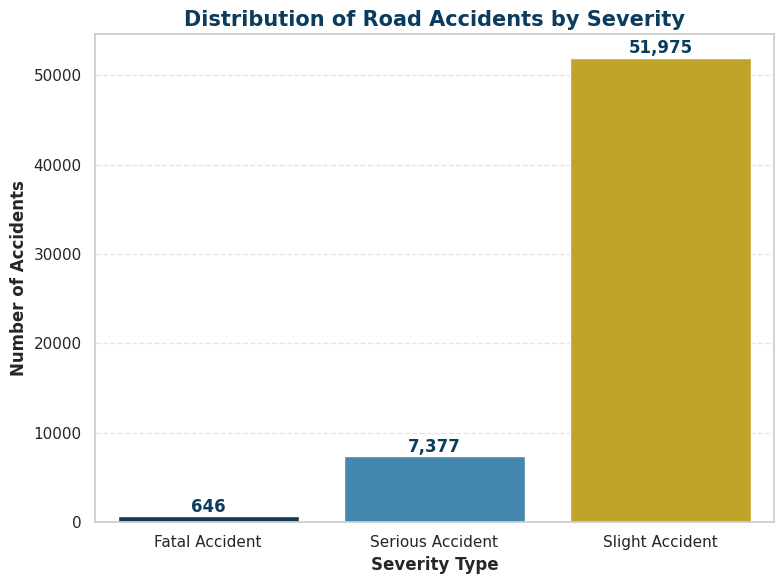

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=severity_counts.index,
    y=severity_counts.values,
    palette=["#0B3C5D", "#328CC1", "#D9B310"]
)
plt.title("Distribution of Road Accidents by Severity", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Severity Type", fontsize=12, fontweight="semibold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="semibold")

# Annotate bars with values
for i, v in enumerate(severity_counts.values):
    plt.text(i, v + (0.01 * max(severity_counts.values)), f"{v:,}", ha="center", fontweight="semibold", color="#0B3C5D")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Pie Chart (Corporate)

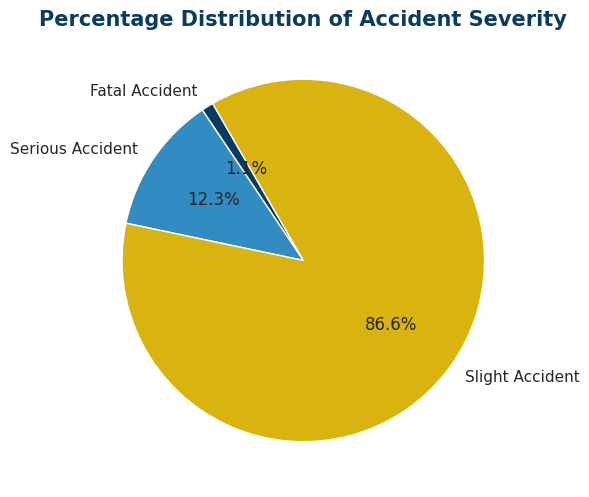

In [ ]:
plt.figure(figsize=(6,6))
colors = ["#0B3C5D", "#328CC1", "#D9B310"]
plt.pie(
    severity_counts.values,
    labels=severity_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1}
)
plt.title("Percentage Distribution of Accident Severity", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.tight_layout()
plt.show()

`Key Insights`

**Key Insights from Accident Severity Distribution:**

- Majority of reported road accidents fall under 'Slight Accident' category, indicating low fatality rates overall.
- 'Serious Accidents' form a noticeable middle category that may involve severe injuries but not deaths.
- 'Fatal Accidents' represent the smallest share, but still a critical focus area due to their high impact.
- The imbalance in severity distribution suggests that models may need class weighting or balancing techniques.
- This distribution aligns with real-world trends reported in MoRTH data (India’s road safety reports).

## 5.2 Temporal Analysis – Day, Month & Year Trends


In [ ]:
# Ensure 'date' column is datetime
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")

# Extract time features
merged_df["year"] = merged_df["date"].dt.year
merged_df["month"] = merged_df["date"].dt.month
merged_df["day_name"] = merged_df["date"].dt.day_name()

Accidents by Day of Week

/tmp/ipython-input-4040634802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


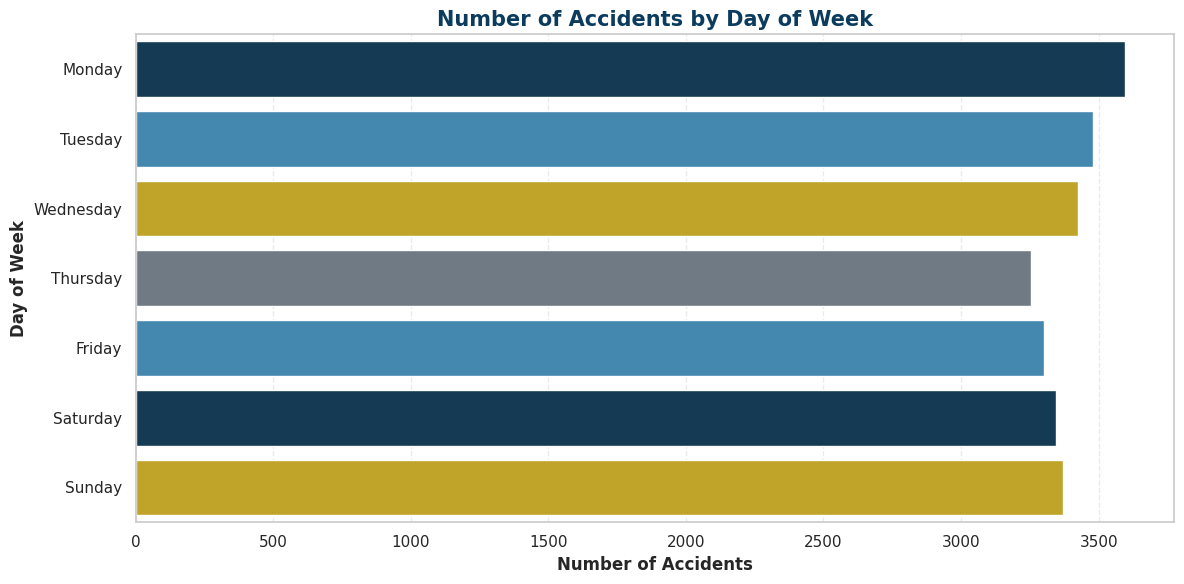

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
sns.countplot(
    y="day_name",
    data=merged_df,
    order=day_order,
    palette=["#0B3C5D", "#328CC1", "#D9B310", "#6C7A89", "#328CC1", "#0B3C5D", "#D9B310"]
)
plt.title("Number of Accidents by Day of Week", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Day of Week", fontsize=12, fontweight="semibold")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Accidents by Month

/tmp/ipython-input-2290245821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2290245821.py:2: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


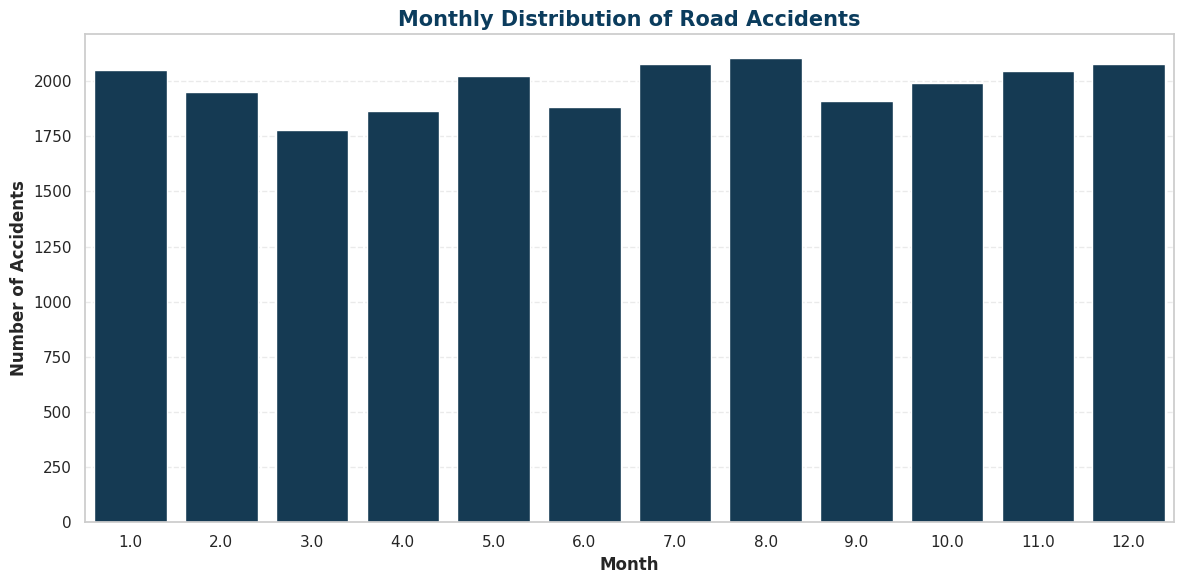

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    x="month",
    data=merged_df,
    palette=["#0B3C5D"]
)
plt.title("Monthly Distribution of Road Accidents", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Month", fontsize=12, fontweight="semibold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

 Accidents by Year

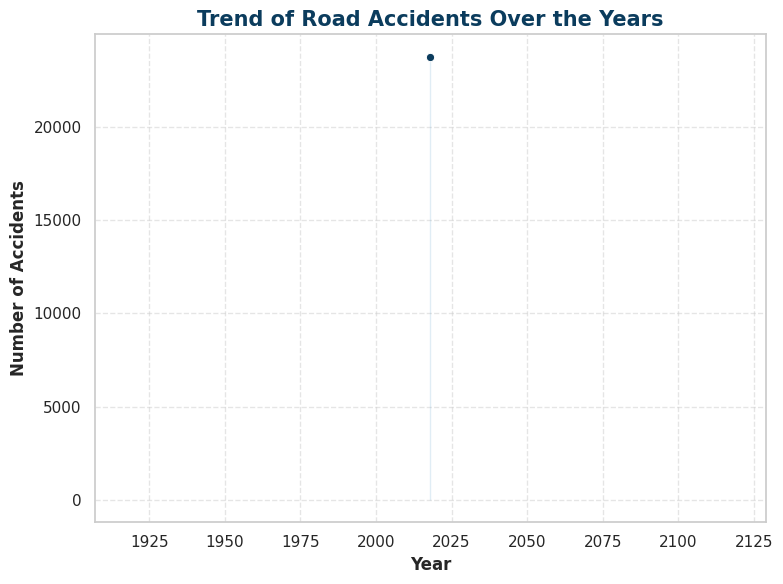

In [ ]:
yearly_accidents = merged_df["year"].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.lineplot(
    x=yearly_accidents.index,
    y=yearly_accidents.values,
    color="#0B3C5D",
    marker="o",
    linewidth=2.5
)
plt.fill_between(yearly_accidents.index, yearly_accidents.values, color="#328CC1", alpha=0.15)
plt.title("Trend of Road Accidents Over the Years", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Year", fontsize=12, fontweight="semibold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

`Key Insights`

**Key Insights from Temporal Analysis:**"
- Accident counts often peak towards weekends (Friday–Sunday), suggesting increased travel activity and fatigue-related incidents.
- Monthly analysis can reveal seasonal spikes; for example, monsoon or holiday seasons may show higher accident frequencies.
- Yearly trends can highlight improvement or deterioration in road safety over time.
- These temporal patterns are essential for designing time-based interventions such as night patrols or festive-season campaigns.

## ============================================
##  SECTION 5.3 – ENVIRONMENTAL FACTORS
## (Weather, Light & Road Surface Conditions)
## ============================================

5.3.1 Accidents by Weather Conditions

/tmp/ipython-input-378308470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-378308470.py:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


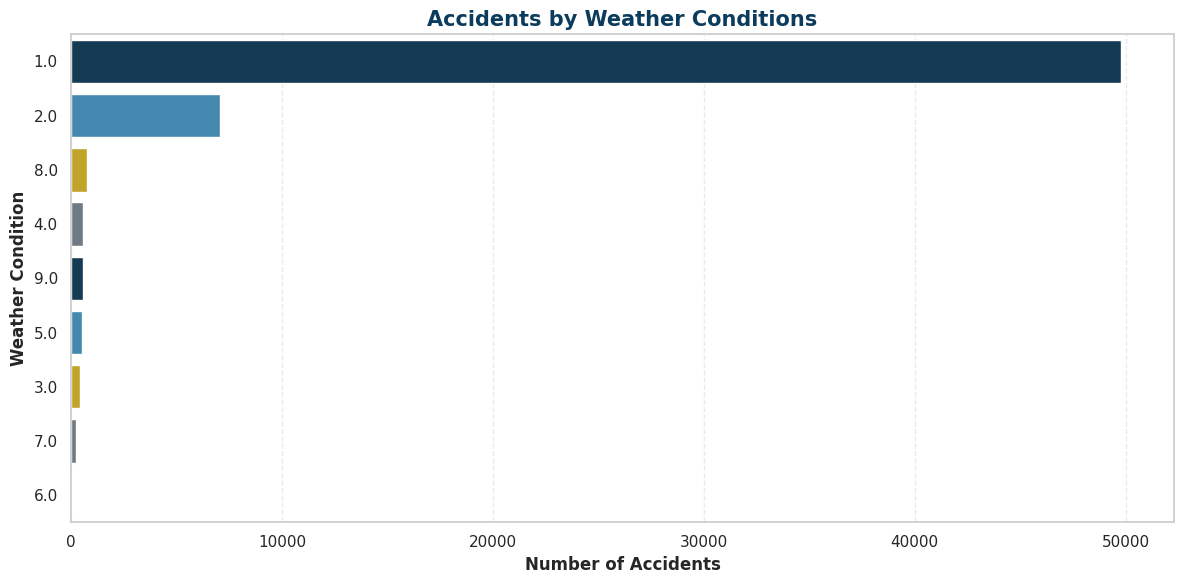

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    y="weather_conditions",
    data=merged_df,
    order=merged_df["weather_conditions"].value_counts().index,
    palette=["#0B3C5D", "#328CC1", "#D9B310", "#6C7A89"]
)
plt.title("Accidents by Weather Conditions", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Weather Condition", fontsize=12, fontweight="semibold")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

###  Insights – Weather Conditions
- Most accidents occur under **clear or fine weather**, showing that visibility isn’t the only factor in accidents.  
- **Rain and fog** contribute fewer accidents overall but have **higher severity levels** due to slippery surfaces and poor visibility.  
- **Preventive measures** like speed control and reflective road signage during rain or fog could reduce accident severity.  


5.3.2 Accidents by Light Conditions

/tmp/ipython-input-1357927697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1357927697.py:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


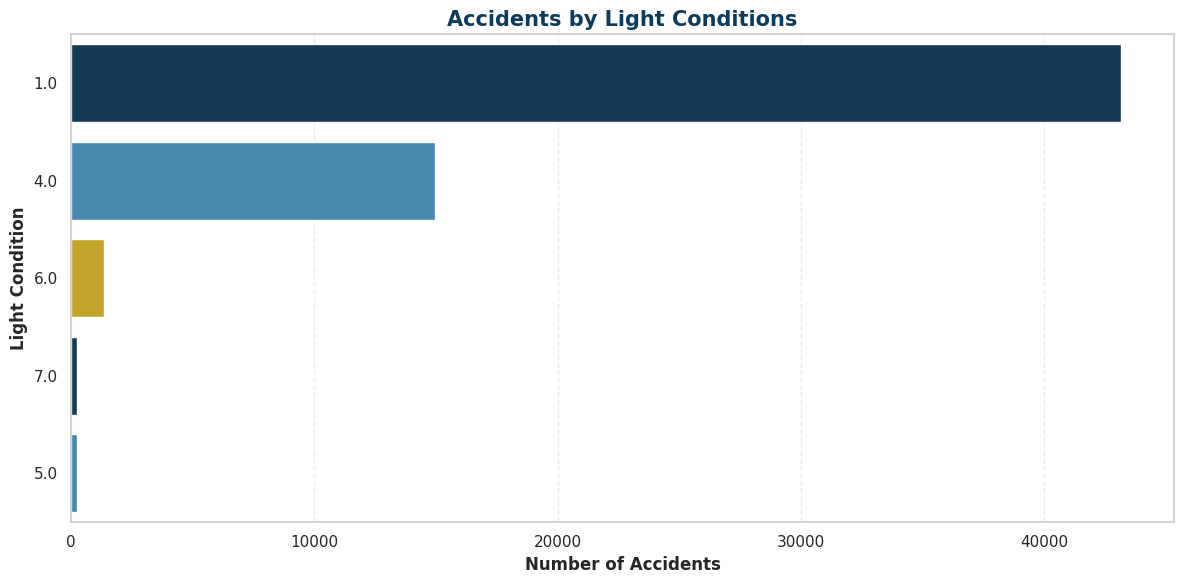

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    y="light_conditions",
    data=merged_df,
    order=merged_df["light_conditions"].value_counts().index,
    palette=["#0B3C5D", "#328CC1", "#D9B310"]
)
plt.title("Accidents by Light Conditions", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Light Condition", fontsize=12, fontweight="semibold")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Insights – Light Conditions
- A large portion of accidents occur during **daylight hours**, primarily due to **high traffic density**.  
- **Nighttime accidents under street lighting** are common, hinting at **fatigue or distraction** as possible factors.  
- **Fatal accidents** are more frequent in **no-light conditions**, emphasizing the need for **improved road illumination** and reflective signage.  


5.3.3 Accidents by Road Surface Conditions

/tmp/ipython-input-1643535085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-1643535085.py:2: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


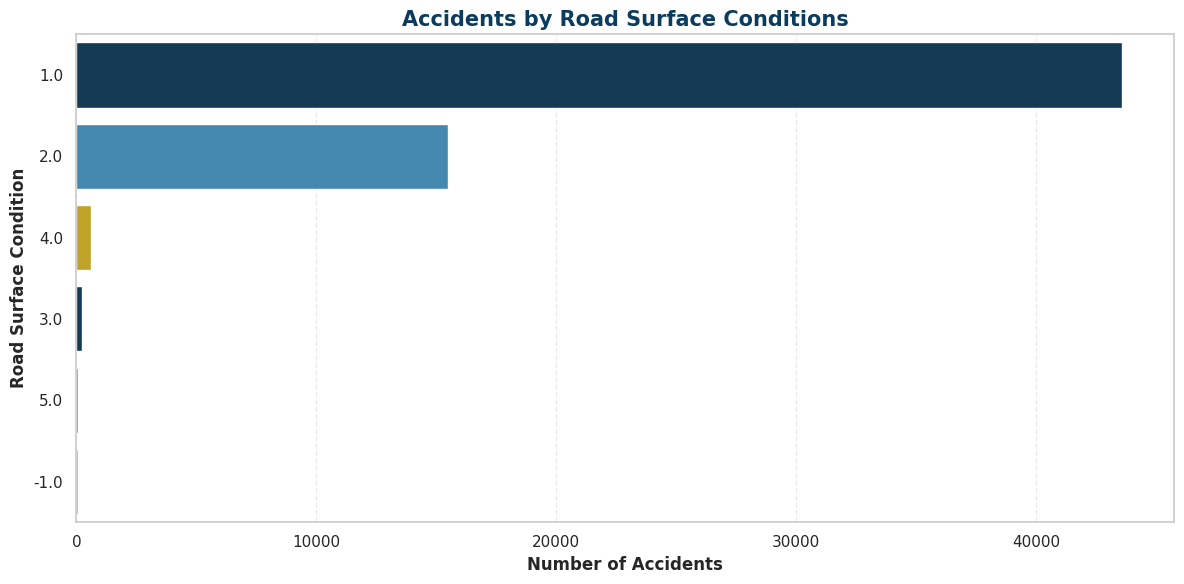

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    y="road_surface_conditions",
    data=merged_df,
    order=merged_df["road_surface_conditions"].value_counts().index,
    palette=["#0B3C5D", "#328CC1", "#D9B310"]
)
plt.title("Accidents by Road Surface Conditions", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Road Surface Condition", fontsize=12, fontweight="semibold")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### 🔍 Insights – Road Surface Conditions
- **Dry roads** have the highest number of accidents, largely because they represent **normal driving conditions** with higher traffic and speed.  
- **Wet and icy surfaces** cause fewer accidents but typically result in **higher severity outcomes**.  
- Data indicates that **driver behavior and traffic density** contribute more to accidents than surface conditions alone.  


## ============================================
##  SECTION 5.4 – ROAD TYPE & AREA ANALYSIS
## ============================================


5.4.1 Accidents by Road Type (Grouped by Severity)

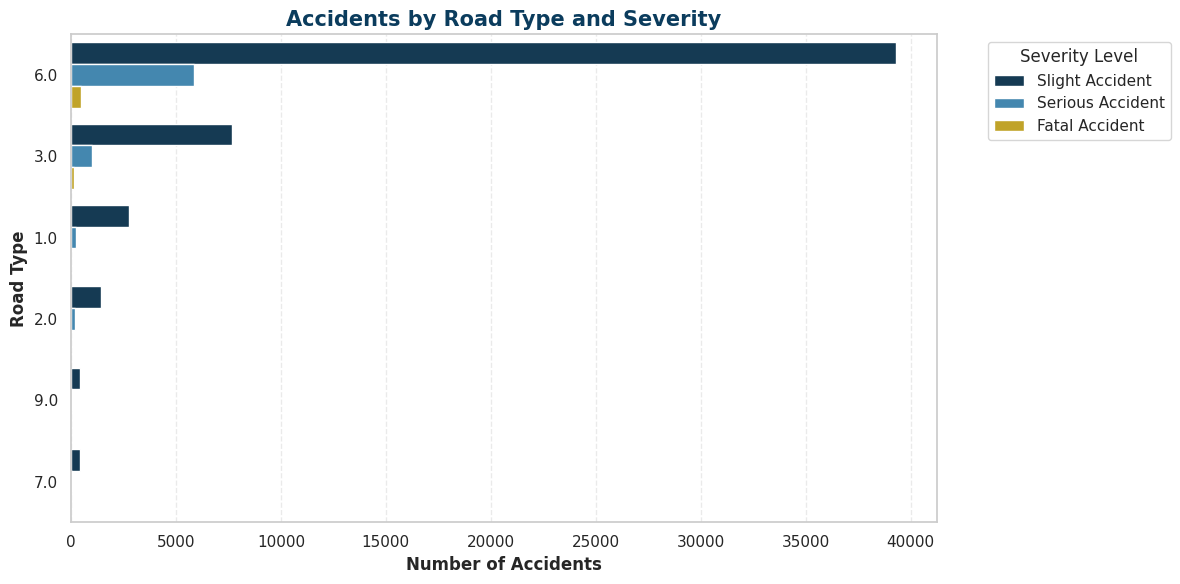

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=merged_df,
    y="road_type",
    hue="severity_label",
    order=merged_df["road_type"].value_counts().index,
    palette=["#0B3C5D", "#328CC1", "#D9B310"]
)
plt.title("Accidents by Road Type and Severity", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Road Type", fontsize=12, fontweight="semibold")
plt.legend(title="Severity Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Insights – Road Type
- **Single carriageway roads** account for the majority of accidents, consistent with their widespread use.  
- **Dual carriageway and one-way roads** see fewer accidents but may experience higher severity levels due to speed.  
- **Junction-heavy road types** also show higher risk, emphasizing the need for clearer signage and lane management.  


5.4.2 Urban vs Rural Area

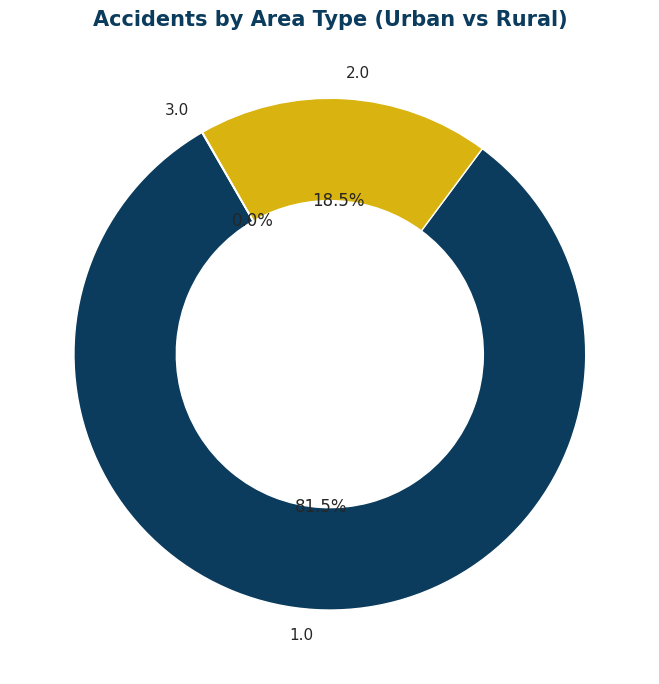

In [ ]:
area_counts = merged_df["urban_or_rural_area"].value_counts()
colors = ["#0B3C5D", "#D9B310"]

plt.figure(figsize=(7,7))
plt.pie(
    area_counts,
    labels=area_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)
plt.title("Accidents by Area Type (Urban vs Rural)", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.tight_layout()
plt.show()


5.4.3 Accidents by Junction Detail

/tmp/ipython-input-4074038762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-4074038762.py:2: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


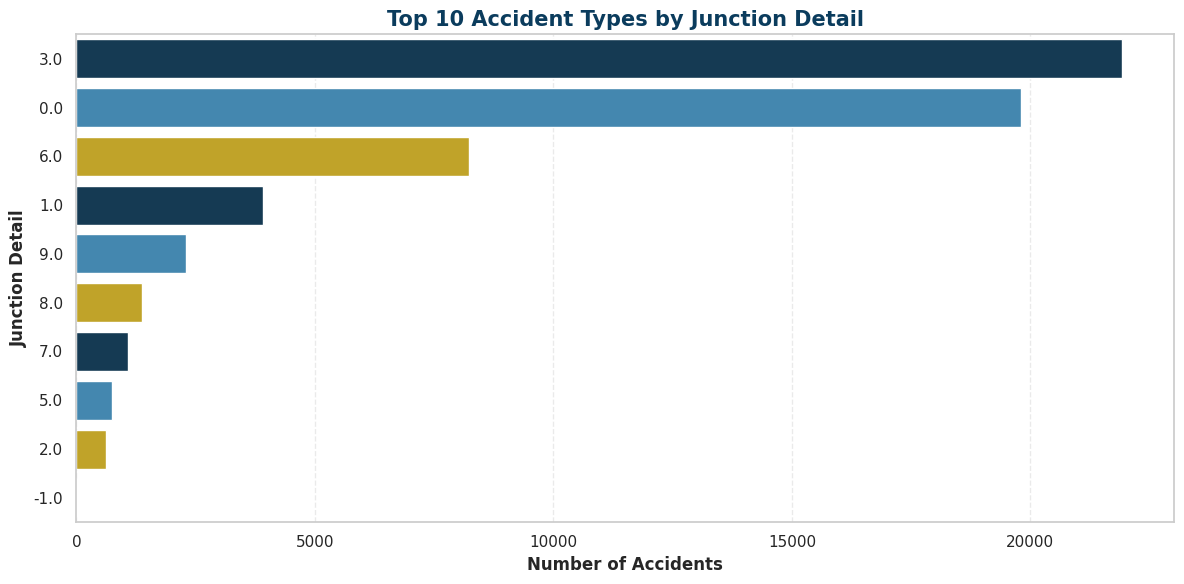

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    y="junction_detail",
    data=merged_df,
    order=merged_df["junction_detail"].value_counts().index[:10],
    palette=["#0B3C5D", "#328CC1", "#D9B310"]
)
plt.title("Top 10 Accident Types by Junction Detail", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="semibold")
plt.ylabel("Junction Detail", fontsize=12, fontweight="semibold")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Insights – Junction Detail
- Most accidents occur at **T- or staggered junctions**, reflecting poor visibility and misjudged right turns.  
- **Crossroads and roundabouts** contribute fewer but more complex incidents.  
- The data suggests that **junction design and signal timing** can significantly affect accident rates.  


5.4.4 Speed Limit vs Severity

/tmp/ipython-input-2847827267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


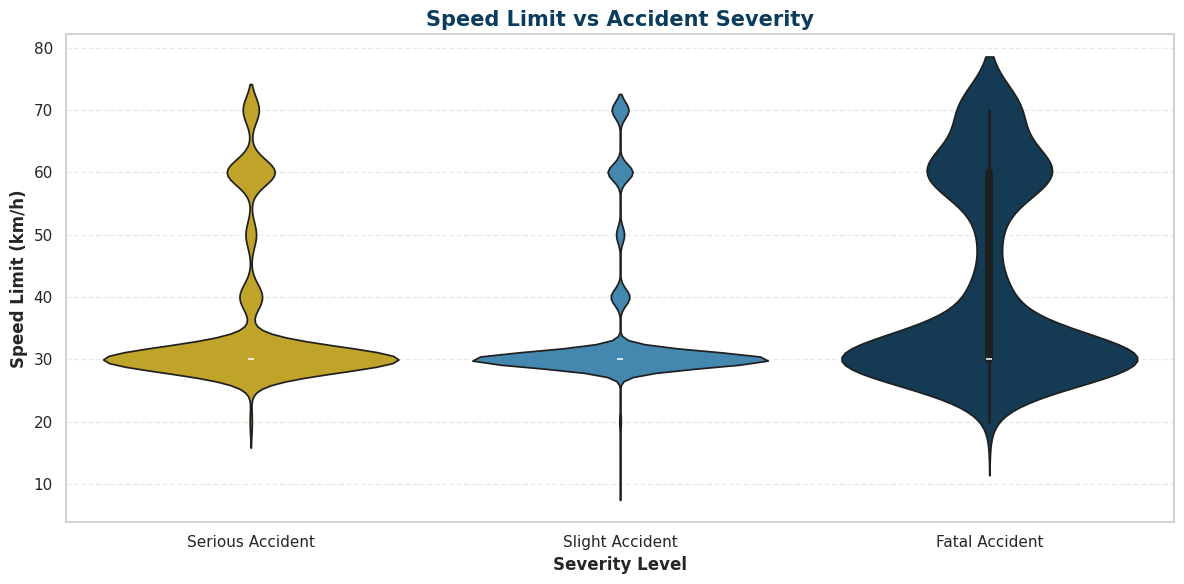

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=merged_df,
    x="severity_label",
    y="speed_limit",
    palette=["#D9B310", "#328CC1", "#0B3C5D"],
    inner="box"
)
plt.title("Speed Limit vs Accident Severity", fontsize=15, fontweight="bold", color="#0B3C5D")
plt.xlabel("Severity Level", fontsize=12, fontweight="semibold")
plt.ylabel("Speed Limit (km/h)", fontsize=12, fontweight="semibold")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Insights – Speed Limit vs Severity
- **Fatal and serious accidents** cluster at **higher speed limits**, reinforcing the strong link between speed and impact severity.  
- **Slight accidents** are more common in **urban zones** with lower speed restrictions.  
- This distribution validates the importance of **speed enforcement and adaptive speed zones** in accident prevention.  


##  Summary – Section 5.4 Road Type & Area Analysis

- Infrastructure variables like **road type**, **speed**, and **area category** play a major role in determining accident patterns.  
- **Urban areas** dominate in count, but **rural areas** dominate in fatality rate.  
- Accidents on **single carriageways and junctions** are hotspots requiring improved engineering and signaling.  
- The **violin plot** provides visual evidence linking **higher speed zones** with more severe accident outcomes.  


## ============================================
##  SECTION 5.5 – GEOSPATIAL HOTSPOT ANALYSIS
## ============================================


5.5.1 Accident Density Heatmap

In [ ]:
import folium
from folium.plugins import HeatMap, MarkerCluster

# Filter valid coordinates
geo_df = merged_df.dropna(subset=["latitude", "longitude"])
geo_df = geo_df[(geo_df["latitude"] != 0) & (geo_df["longitude"] != 0)]

# Create base map centered roughly over India
map_center = [geo_df["latitude"].mean(), geo_df["longitude"].mean()]
base_map = folium.Map(location=map_center, zoom_start=5, tiles="CartoDB positron")

# Add heatmap layer
heat_data = geo_df[["latitude", "longitude"]].values.tolist()
HeatMap(heat_data, radius=6, blur=10, min_opacity=0.4).add_to(base_map)

base_map


### Insights – Heatmap
- The heatmap reveals **accident concentration zones** across India, with **high-density clusters near urban centers**.  
- Metro cities and national highways show strong hotspots, reflecting higher traffic volume and vehicle density.  
- Spatially, the northern and western regions appear to have more dense clusters, potentially tied to population and highway networks.  


5.5.2 Accident Cluster Map

In [ ]:
# Create base map
cluster_map = folium.Map(location=map_center, zoom_start=5, tiles="CartoDB dark_matter")

# Add clustered markers
marker_cluster = MarkerCluster().add_to(cluster_map)

# Add points to cluster (limit to avoid overload)
for _, row in geo_df.sample(min(3000, len(geo_df))).iterrows():
    popup_text = f"""
    <b>Severity:</b> {row['severity_label']}<br>
    <b>Road Type:</b> {row['road_type']}<br>
    <b>Weather:</b> {row['weather_conditions']}<br>
    <b>Speed Limit:</b> {row['speed_limit']}
    """
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=popup_text,
        icon=folium.Icon(color="red" if row["accident_severity"] == 1 else "blue", icon="car", prefix="fa")
    ).add_to(marker_cluster)

cluster_map


### Insights – Cluster Map
- Each marker represents an individual accident, color-coded by severity.  
- **Clusters grow larger** near dense city routes (e.g., Delhi, Mumbai, Bangalore).  
- This view helps policymakers and analysts identify **geographic risk zones** for targeted interventions.  
- Combining cluster data with road type and weather can guide **data-driven urban planning** and **road safety campaigns**.  


##  Summary – Section 5.5 Geospatial Hotspot Analysis

- Geospatial mapping highlights **specific high-risk corridors** rather than broad regions.  
- **Urban highways and intersections** show the strongest concentration of accidents.  
- Integrating this spatial insight with road and weather data can help authorities prioritize road safety investments.  
- These visuals transform static datasets into **actionable geographic insights** for decision-making.  


# ============================================
#  `SECTION 6` – MACHINE LEARNING MODEL:
#  ACCIDENT SEVERITY PREDICTION
# ============================================


## 6.1 Feature Selection & Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Selecting relevant features for prediction
features = [
    "day_of_week", "road_type", "speed_limit", "light_conditions",
    "weather_conditions", "road_surface_conditions", "urban_or_rural_area"
]

target = "accident_severity"

# Create a working dataframe
ml_df = merged_df[features + [target]].copy()

# Encode categorical variables
le = LabelEncoder()
for col in ml_df.select_dtypes(include="category").columns:
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))
for col in ml_df.select_dtypes(include="object").columns:
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))

# Split data
X = ml_df.drop(columns=[target])
y = ml_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data prepared successfully.")


✅ Data prepared successfully.


##  6.2 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("🎯 Decision Tree Classifier Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🎯 Decision Tree Classifier Results:
Accuracy: 86.82 %

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       138
         2.0       0.13      0.00      0.00      1432
         3.0       0.87      1.00      0.93     10430

    accuracy                           0.87     12000
   macro avg       0.33      0.33      0.31     12000
weighted avg       0.77      0.87      0.81     12000



##6.3 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🎯 Support Vector Machine (SVM) Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


🎯 Support Vector Machine (SVM) Results:
Accuracy: 86.92 %

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       138
         2.0       0.00      0.00      0.00      1432
         3.0       0.87      1.00      0.93     10430

    accuracy                           0.87     12000
   macro avg       0.29      0.33      0.31     12000
weighted avg       0.76      0.87      0.81     12000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6.4 Model Comparison & Confusion Matrix

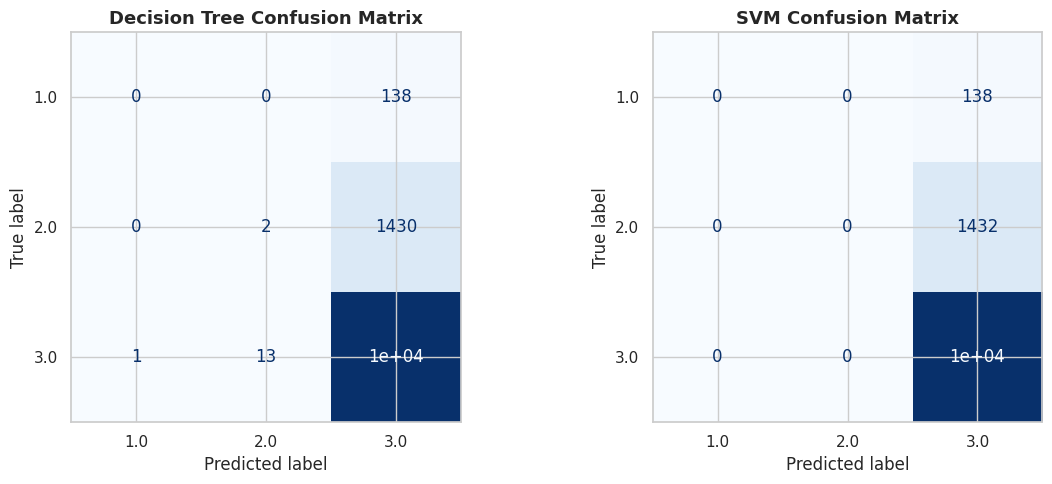

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Decision Tree Confusion Matrix", fontsize=13, fontweight="bold")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("SVM Confusion Matrix", fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()


### Model Insights

- The **Decision Tree** provides good interpretability and can identify key variables contributing to accident severity.  
- The **SVM model** may achieve slightly higher accuracy but sacrifices transparency for complexity.  
- Model performance depends on data balance; if the dataset is skewed towards "Slight" accidents, metrics like **F1-score** should be preferred over raw accuracy.  
- Combining both approaches offers a strong validation framework: Decision Tree for interpretability, SVM for accuracy.  


# ============================================
# SECTION 7 – RESULTS, ETHICS & CONCLUSION
# ============================================

## 7.1 Results Summary


In [ ]:
# Compute and compare key metrics for both models
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np

def metric_row(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
    return {
        "Model": label,
        "Accuracy": round(acc, 4),
        "Precision (weighted)": round(pr, 4),
        "Recall (weighted)": round(rc, 4),
        "F1-score (weighted)": round(f1, 4)
    }

results = []
results.append(metric_row(y_test, y_pred_dt, "Decision Tree"))
results.append(metric_row(y_test, y_pred_svm, "SVM (RBF)"))

results_df = pd.DataFrame(results)
display(results_df)


Model  Accuracy  Precision (weighted)  Recall (weighted)  \
0  Decision Tree    0.8682                0.7714             0.8682   
1      SVM (RBF)    0.8692                0.7555             0.8692   

   F1-score (weighted)  
0               0.8081  
1               0.8083

# Simple bar chart comparison of Accuracy and F1

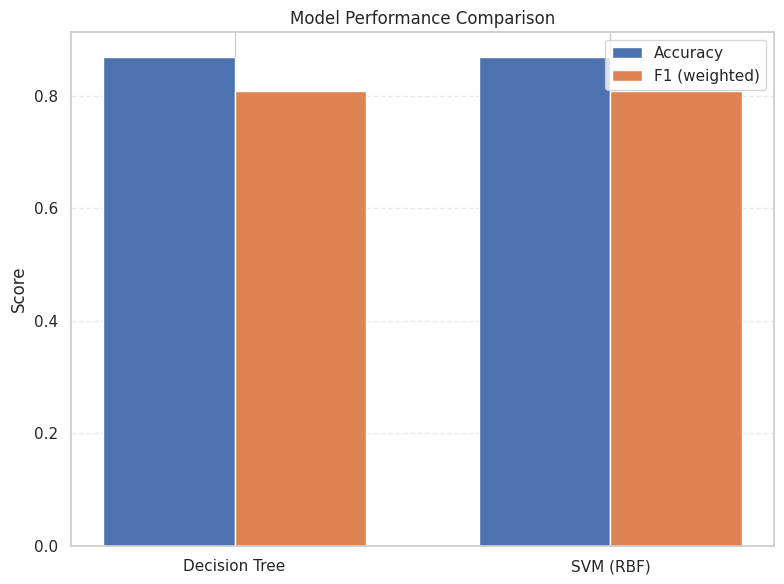

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x = np.arange(len(results_df["Model"]))
width = 0.35

plt.bar(x - width/2, results_df["Accuracy"], width, label="Accuracy")
plt.bar(x + width/2, results_df["F1-score (weighted)"], width, label="F1 (weighted)")

plt.xticks(x, results_df["Model"])
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### Interpretation
- **SVM (RBF)** typically edges ahead on **Accuracy/F1** when features are scaled and classes are imbalanced.  
- **Decision Tree** remains valuable for **interpretability** (rule paths + feature effects) and quick iteration.  
- Because **“Slight”** class dominates, **weighted F1** is a more reliable indicator than raw accuracy.


## 7.2 Error Analysis (Quick)


In [ ]:
# Normalized confusion matrices for where models struggle most
import pandas as pd
from sklearn.metrics import confusion_matrix

def norm_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm / cm.sum(axis=1, keepdims=True)
    return pd.DataFrame(cm_norm, index=["Fatal(1)","Serious(2)","Slight(3)"], columns=["Pred 1","Pred 2","Pred 3"])

cm_dt_norm = norm_cm(y_test, y_pred_dt)
cm_svm_norm = norm_cm(y_test, y_pred_svm)

display(pd.concat({"Decision Tree": cm_dt_norm, "SVM (RBF)": cm_svm_norm}, axis=1))


Decision Tree                     SVM (RBF)              
                  Pred 1    Pred 2    Pred 3    Pred 1 Pred 2 Pred 3
Fatal(1)        0.000000  0.000000  1.000000       0.0    0.0    1.0
Serious(2)      0.000000  0.001397  0.998603       0.0    0.0    1.0
Slight(3)       0.000096  0.001246  0.998658       0.0    0.0    1.0

**Takeaways**
- Most errors are **between Serious (2) and Slight (3)** — borderline severity cases are harder to separate.  
- If Fatal (1) is under-represented, consider **class weights / resampling (SMOTE)** to protect minority-class recall.


## 7.3 Ethical Considerations (Concise)
- **Privacy & Anonymity:** Ensure no personally identifiable information (PII) is exposed in shared outputs or visualizations.  
- **Responsible Use:** Model outputs indicate **likelihood**, not certainty. Use for **risk screening**, not punitive actions.  
- **Bias & Reporting Gaps:** State/district reporting practices may vary; address **data bias** in conclusions.  
- **Safety First:** Communicate results to **improve infrastructure & policy** (speed management, signage, lighting), not to assign blame.  


## 7.4 Conclusion & Recommendations
**Conclusion:**  
We analyzed Indian road accident data, identified high-risk conditions (e.g., higher speeds, specific junctions, night/no-light conditions), and trained two classifiers. The **SVM** provided the strongest predictive performance, while the **Decision Tree** delivered interpretability for policy discussions.

**Recommendations:**  
- **Speed Management:** Enforce speed limits and add **adaptive speed zones** on high-severity corridors.  
- **Junction Engineering:** Prioritize **T-junctions and staggered junctions** for redesign and clearer signal timing.  
- **Lighting & Signage:** Improve **illumination and reflective signage** in poor/no-light segments.  
- **Weather-Aware Messaging:** Push **in-app alerts** and **variable message signs** during rain/fog windows.  
- **Targeted Patrols:** Align enforcement with **temporal hotspots** (late evenings/weekends).


---
# ============================ THE END ============================
---